In [61]:
import pandas as pd

In [62]:
import numpy as np

In [63]:
import matplotlib.pyplot as plt

In [64]:
import seaborn as sns

In [65]:
#DATA LOADING
# Load the dataset
df = pd.read_csv('student-mat.csv',sep=';')

In [66]:
# Display the first few rows
print("First few Rows")
print(df.head())

First few Rows
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [67]:
#DATA EXPLORATION
print("null values")
# Check for missing values
print(df.isnull().sum())

null values
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [68]:
# Display column data types
print("column data")
print(df.dtypes)


column data
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [69]:
# Understand the dataset's size
print("Size of dataset")
print(df.shape)


Size of dataset
(395, 33)


In [70]:
#DATA CLEANING
# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical column
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numeric column
        df[col].fillna(df[col].median(), inplace=True)


In [71]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate entries
df.drop_duplicates(inplace=True)

print(f"Number of rows after removing duplicates: {df.shape[0]}")


Number of duplicate rows: 0
Number of rows after removing duplicates: 395


In [72]:
#DATA ANALYSIS QUESTION
#the average score in math (G3)
avg_score = df['G3'].mean()
print(f"Average score in math (G3): {avg_score}")

Average score in math (G3): 10.415189873417722


In [73]:
#students scored above 15 in their final grade (G3)?
students_above_15 = df[df['G3'] > 15].shape[0]
print(f"Number of students who scored above 15 in G3: {students_above_15}")


Number of students who scored above 15 in G3: 40


In [74]:
# a correlation between study time (study time) and the final grade (G3)
correlation = df['studytime'].corr(df['G3'])
print(f"Correlation between study time and final grade: {correlation}")

Correlation between study time and final grade: 0.0978196896531963


In [75]:
#gender has a higher average final grade (G3)
gender_avg = df.groupby('sex')['G3'].mean()
print(f"Average final grade by gender:\n{gender_avg}")


Average final grade by gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


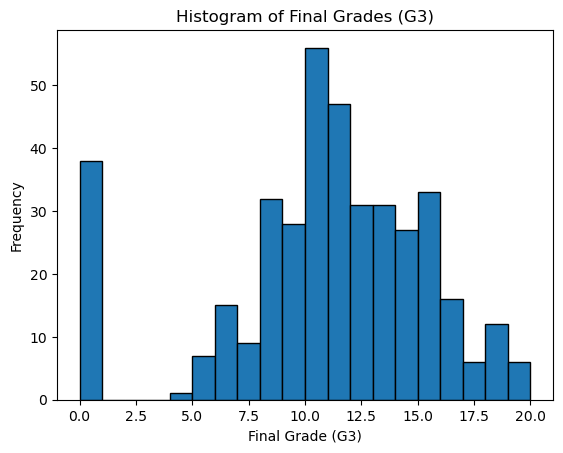

In [76]:
#DATA VISUALISATION
# 1. Plot a histogram of final grades (G3).
plt.hist(df['G3'], bins=20, edgecolor='black')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()


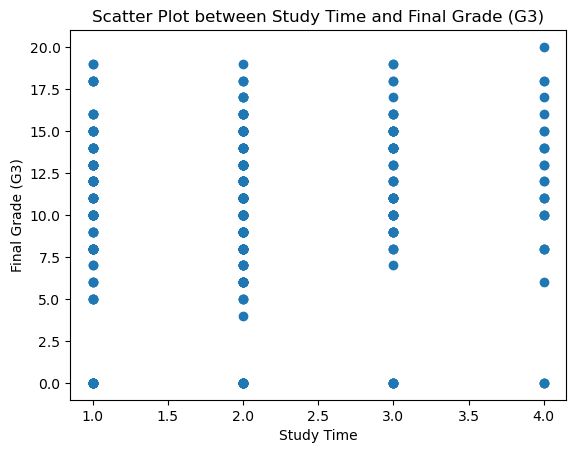

In [77]:
# 2. Create a scatter plot between study time (study time) and final grade (G3).
plt.scatter(df['studytime'], df['G3'])
plt.title('Scatter Plot between Study Time and Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()


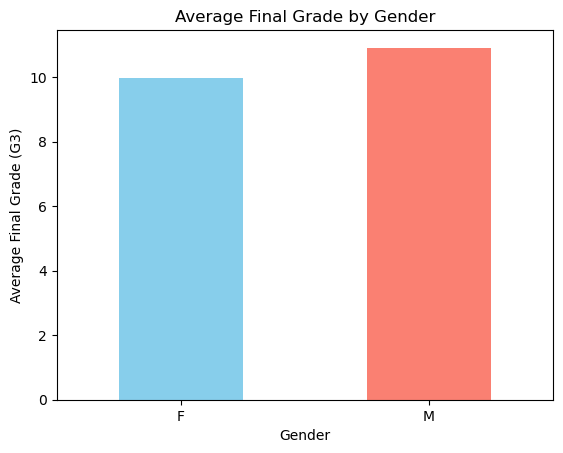

In [78]:
# 3. Create a bar chart comparing the average scores of male and female students.
gender_avg = df.groupby('sex')['G3'].mean()

gender_avg.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(rotation=0)
plt.show()
